<a href="https://colab.research.google.com/github/stongao/colab/blob/main/mel_spectorgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary libraries (only needed for the first run)
!pip install librosa matplotlib numpy scipy requests pydub

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import find_peaks
import requests
from pydub import AudioSegment
import os
from urllib.parse import quote

In [3]:
# base_url = "https://ia903204.us.archive.org/0/items/RaagYaman_201707/"
# file_name = "Sitar  Ravi Shankar, A Sitar Recital - Raga Yaman Manj.mp3"

# base_url = "https://ia902203.us.archive.org/27/items/24-piano-keys/"
# file_name = "key02.mp3"

base_url = "https://ia601302.us.archive.org/7/items/CMajorScale-CelloVoiceoverMp3/"
file_name = "CmajScaleWithV_o.mp3"

encoded_filename = quote(file_name, safe="")  # Encodes all special characters
mp3_url = base_url + encoded_filename

# 📌 Step 2: Download the MP3 file
mp3_filename = "downloaded_audio.mp3"
wav_filename = "converted_audio.wav"

response = requests.get(mp3_url)
if response.status_code == 200:
    with open(mp3_filename, "wb") as f:
        f.write(response.content)
    print(f"✅ MP3 file downloaded: {mp3_filename}")
else:
    print("❌ Failed to download the MP3 file")


✅ MP3 file downloaded: downloaded_audio.mp3


In [4]:
# 📌 Step 3: Convert MP3 to WAV (if necessary)
audio = AudioSegment.from_mp3(mp3_filename)
audio.export(wav_filename, format="wav")
print(f"✅ MP3 converted to WAV: {wav_filename}")

# 📌 Step 4: Load the audio file into Librosa
y, sr = librosa.load(wav_filename, sr=22050)

# Play the downloaded audio file
print("Playing downloaded audio...")
ipd.display(ipd.Audio(y, rate=sr))

# 📌 Step 5: Compute the Mel-Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

✅ MP3 converted to WAV: converted_audio.wav
Playing downloaded audio...


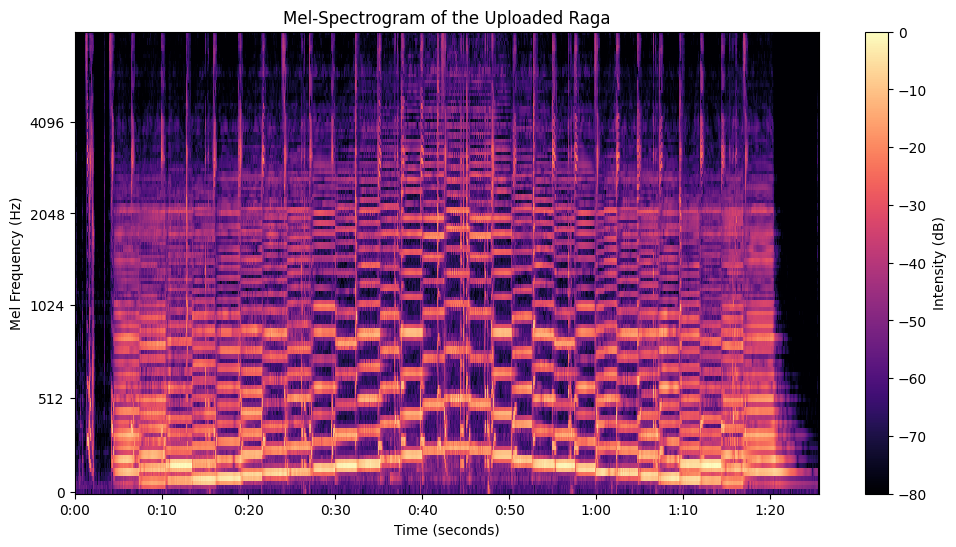

In [5]:
# 📌 Step 6: Plot the Mel-Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
plt.colorbar(label="Intensity (dB)")
plt.title("Mel-Spectrogram of the Uploaded Raga")
plt.xlabel("Time (seconds)")
plt.ylabel("Mel Frequency (Hz)")
plt.show()

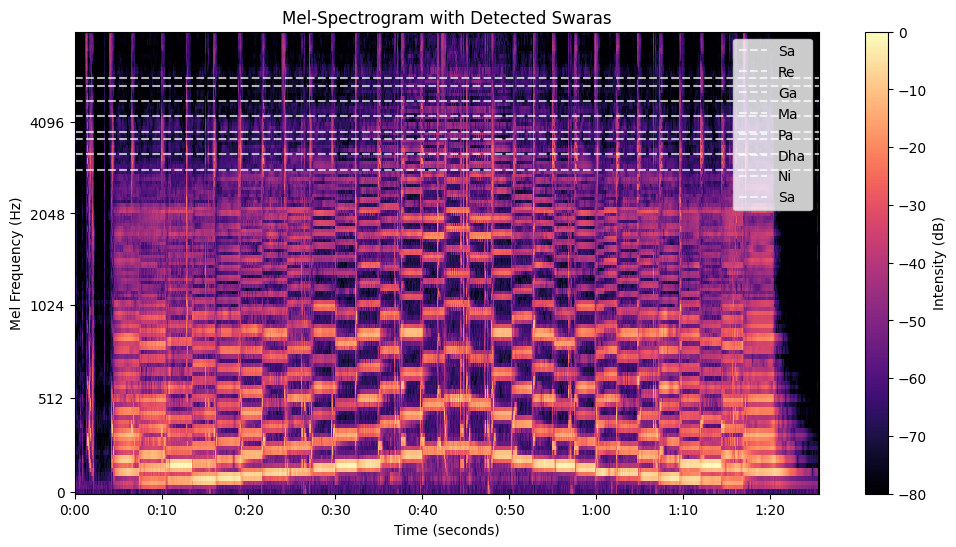

Estimated Sa Frequency: 2851.50 Hz
Detected Swaras and Their Frequencies:
Sa: 2851.50 Hz
Re: 3199.38 Hz
Ga: 3592.89 Hz
Ma: 3792.50 Hz
Pa: 4277.25 Hz
Dha: 4790.52 Hz
Ni: 5389.34 Hz
Sa: 5703.00 Hz
✅ Cleanup done: Removed temporary files


In [6]:
# 📌 Step 7: Detect Prominent Frequencies (Candidate Swaras)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
peaks, _ = find_peaks(spectral_centroids, distance=200)

# Approximate Swara frequency ratios
swaras = ['Sa', 'Re', 'Ga', 'Ma', 'Pa', 'Dha', 'Ni', 'Sa']
swaras_freq_ratios = [1.0, 1.122, 1.26, 1.33, 1.5, 1.68, 1.89, 2.0]

# Estimate the tonic (Sa)
sa_freq = np.median(spectral_centroids[peaks])
swaras_freqs = [sa_freq * ratio for ratio in swaras_freq_ratios]

# 📌 Step 8: Plot the Mel-Spectrogram with Swaras
plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
plt.colorbar(label="Intensity (dB)")
plt.title("Mel-Spectrogram with Detected Swaras")
plt.xlabel("Time (seconds)")
plt.ylabel("Mel Frequency (Hz)")

# Mark detected Swaras
for i, freq in enumerate(swaras_freqs):
    plt.axhline(y=freq, color='white', linestyle='--', alpha=0.7, label=swaras[i])

plt.legend(loc="upper right")
plt.show()

# Print estimated Sa and detected Swara frequencies
print(f"Estimated Sa Frequency: {sa_freq:.2f} Hz")
print("Detected Swaras and Their Frequencies:")
for swara, freq in zip(swaras, swaras_freqs):
    print(f"{swara}: {freq:.2f} Hz")

# Cleanup: Remove downloaded and converted files to save space
os.remove(mp3_filename)
os.remove(wav_filename)
print("✅ Cleanup done: Removed temporary files")